# Importing Libraries and Packages

In [1]:
# Base
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# EDA
import missingno as msno

# Visualisation
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.tree import plot_tree

# Text-Based Analyses
import gensim.downloader
from gensim.models import KeyedVectors
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re
from sklearn.metrics.pairwise import cosine_similarity

# One-hot Encoding
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Voting
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier

# Classifiers
from sklearn.tree import DecisionTreeClassifier                                     
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV                
from sklearn.linear_model import SGDClassifier                                      
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestNeighbors                                      
from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC                                                        
from sklearn.ensemble import AdaBoostClassifier 

# Regressors
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Clustering
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
import scipy.cluster.hierarchy as sch  

# Scalers and Transformers
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline                                               
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, KBinsDiscretizer
from sklearn.impute import SimpleImputer

# Metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, precision_score, roc_curve, roc_auc_score, f1_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from scipy.stats import zscore, boxcox
from sklearn.model_selection import cross_val_score  

In [2]:
# Set Seed
SEED = 50

# Importing Data

In [3]:
# Import data
path = "data/kickstarter_projects.csv"

df_kickstarter = pd.read_csv(path)
df_kickstarter.head(2)

,ID,Name,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,State
0,1860890148,Grace Jones Does Not Give A F$#% T-Shirt (limi...,Fashion,Fashion,United States,2009-04-21 21:02:48,2009-05-31,1000,625,30,Failed
1,709707365,CRYSTAL ANTLERS UNTITLED MOVIE,Film & Video,Shorts,United States,2009-04-23 00:07:53,2009-07-20,80000,22,3,Failed


In [4]:
# Converting dates to datetime objects
df_kickstarter['Launched'] = pd.to_datetime(df_kickstarter['Launched'], format='%Y-%m-%d %H:%M:%S')
df_kickstarter['Deadline'] = pd.to_datetime(df_kickstarter['Deadline'], format='%Y-%m-%d')

# EDA

#### Data Overview

In [5]:
df_kickstarter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374853 entries, 0 to 374852
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   ID           374853 non-null  int64         
 1   Name         374853 non-null  object        
 2   Category     374853 non-null  object        
 3   Subcategory  374853 non-null  object        
 4   Country      374853 non-null  object        
 5   Launched     374853 non-null  datetime64[ns]
 6   Deadline     374853 non-null  datetime64[ns]
 7   Goal         374853 non-null  int64         
 8   Pledged      374853 non-null  int64         
 9   Backers      374853 non-null  int64         
 10  State        374853 non-null  object        
dtypes: datetime64[ns](2), int64(4), object(5)
memory usage: 31.5+ MB


In [6]:
df_kickstarter.describe()

,ID,Launched,Deadline,Goal,Pledged,Backers
count,3.748530e+05,374853,374853,3.748530e+05,3.748530e+05,374853.000000
mean,1.074656e+09,2014-09-26 12:22:30.728664320,2014-10-30 04:00:35.149778944,4.586378e+04,9.121073e+03,106.690359
min,5.971000e+03,2009-04-21 21:02:48,2009-05-03 00:00:00,0.000000e+00,0.000000e+00,0.000000
25%,5.380728e+08,2013-04-30 22:06:24,2013-06-01 00:00:00,2.000000e+03,3.100000e+01,2.000000
50%,1.075300e+09,2014-12-02 19:02:35,2015-01-06 00:00:00,5.500000e+03,6.250000e+02,12.000000
75%,1.610149e+09,2016-03-29 19:50:49,2016-05-01 00:00:00,1.600000e+04,4.051000e+03,57.000000
max,2.147476e+09,2018-01-02 15:02:31,2018-03-03 00:00:00,1.663614e+08,2.033899e+07,219382.000000
std,6.191377e+08,NaN,NaN,1.158778e+06,9.132054e+04,911.718520


Suspect right-skewed distributions for Goal, Pledged, and Backers.

In [7]:
# Check for duplicates
df_kickstarter.duplicated().sum()

0

# Visualizations and Data Cleaning

#### Numerical feature distribution

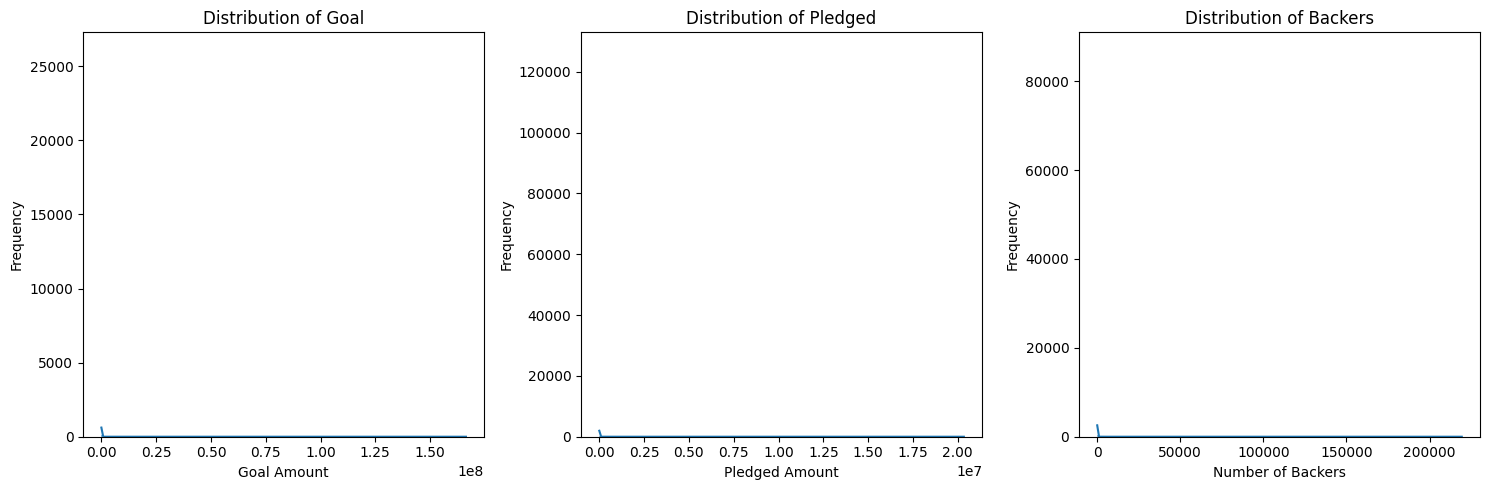

In [8]:
# Plotting Histograms of numeric columns Goal, Pledged, Backers
# WARNING: Running this takes forever
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(df_kickstarter['Goal'], kde=True)
plt.title('Distribution of Goal')
plt.xlabel('Goal Amount')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
sns.histplot(df_kickstarter['Pledged'], kde=True)
plt.title('Distribution of Pledged')
plt.xlabel('Pledged Amount')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
sns.histplot(df_kickstarter['Backers'], kde=True)
plt.title('Distribution of Backers')
plt.xlabel('Number of Backers')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [8]:
# Log transform the numerical columns. Handle potential errors from log(0)
def log_transform(x):
    return np.log1p(x)

df_kickstarter['log_Goal'] = log_transform(df_kickstarter['Goal'])
df_kickstarter['log_Pledged'] = log_transform(df_kickstarter['Pledged'])
df_kickstarter['log_Backers'] = log_transform(df_kickstarter['Backers'])

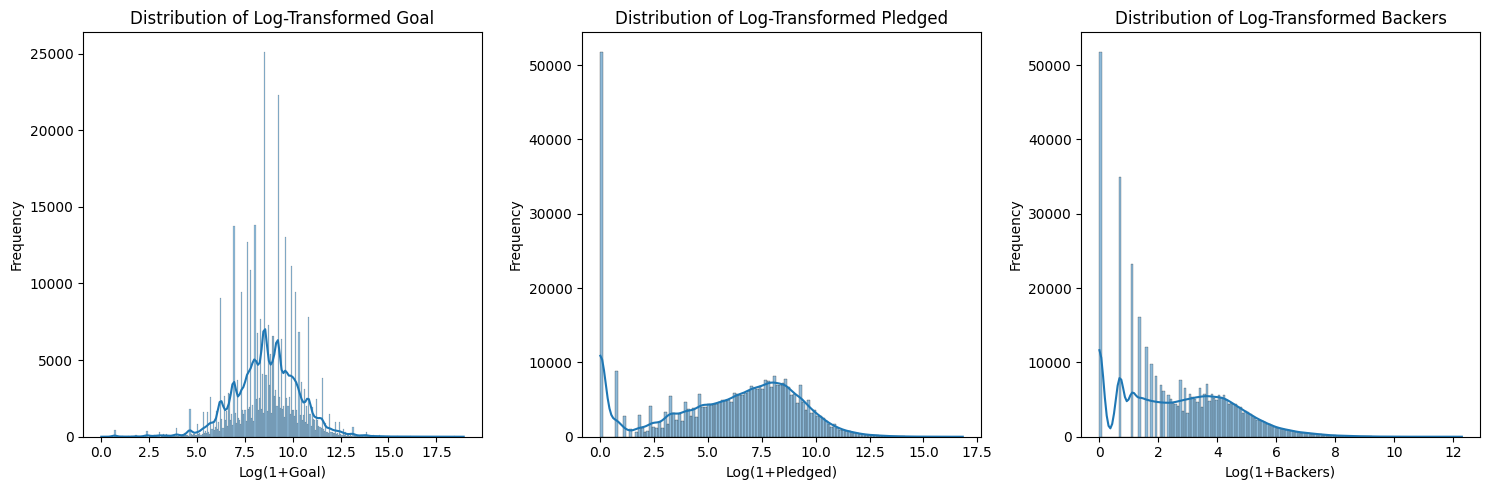

In [9]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(df_kickstarter['log_Goal'], kde=True)
plt.title('Distribution of Log-Transformed Goal')
plt.xlabel('Log(1+Goal)')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
sns.histplot(df_kickstarter['log_Pledged'], kde=True)
plt.title('Distribution of Log-Transformed Pledged')
plt.xlabel('Log(1+Pledged)')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
sns.histplot(df_kickstarter['log_Backers'], kde=True)
plt.title('Distribution of Log-Transformed Backers')
plt.xlabel('Log(1+Backers)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

log-transformed distributions look much better and more interpretable. Some observations:
- left peaks near zero: log-Pledged and log-Backers have sharp peak near 0 (very small or no funding/backers)
- distribution shapes: log-goal appears roughly symmetrical after transformation, indicating most projects have mid-range funding goals 

#### Correlation Analysis

In [10]:
# Select numerical columns for correlation analysis
numerical_cols = ['Goal', 'Pledged', 'Backers', 'log_Goal', 'log_Pledged', 'log_Backers']

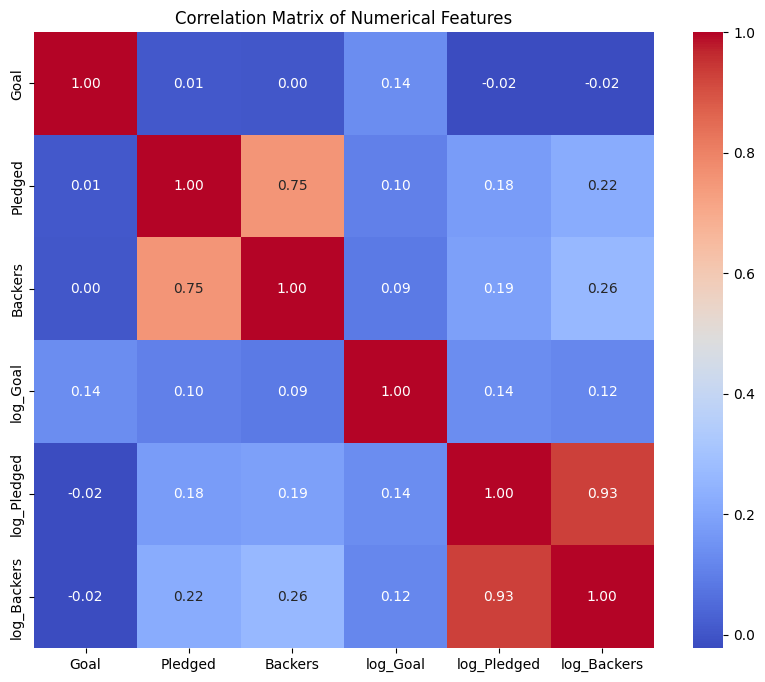

In [11]:
# Calculate and plot Correlation matrix
correlation_matrix = df_kickstarter[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

High correlation between 'Pledged' and 'Backers' bzw. 'log_Pledged' and 'log_Backers' - potentially problematic. Options to handle:
- drop 1 feature, keep the other
- combine them into a new feature that captures the information from both variables, e.g. 'Pledge_per_Backer' (Ratio to analyze funding efficiency)
- PCA to reduce multicollinearity and create uncorrelated components from highly correlated features
- algorithm-specific solutions: dtrees, xgb don't mind correlated features

#### Relationships with the Target Variable

In [12]:
df_kickstarter['State'].unique()

array(['Failed', 'Successful', 'Canceled', 'Suspended', 'Live'],
      dtype=object)

In [13]:
# Filter for successful/failed campaigns and convert to binary
df_kickstarter_filtered = df_kickstarter[df_kickstarter['State'].isin(['Successful', 'Failed'])]
df_kickstarter_filtered['State_num'] = df_kickstarter_filtered['State'].map({'Successful': 1, 'Failed': 0})

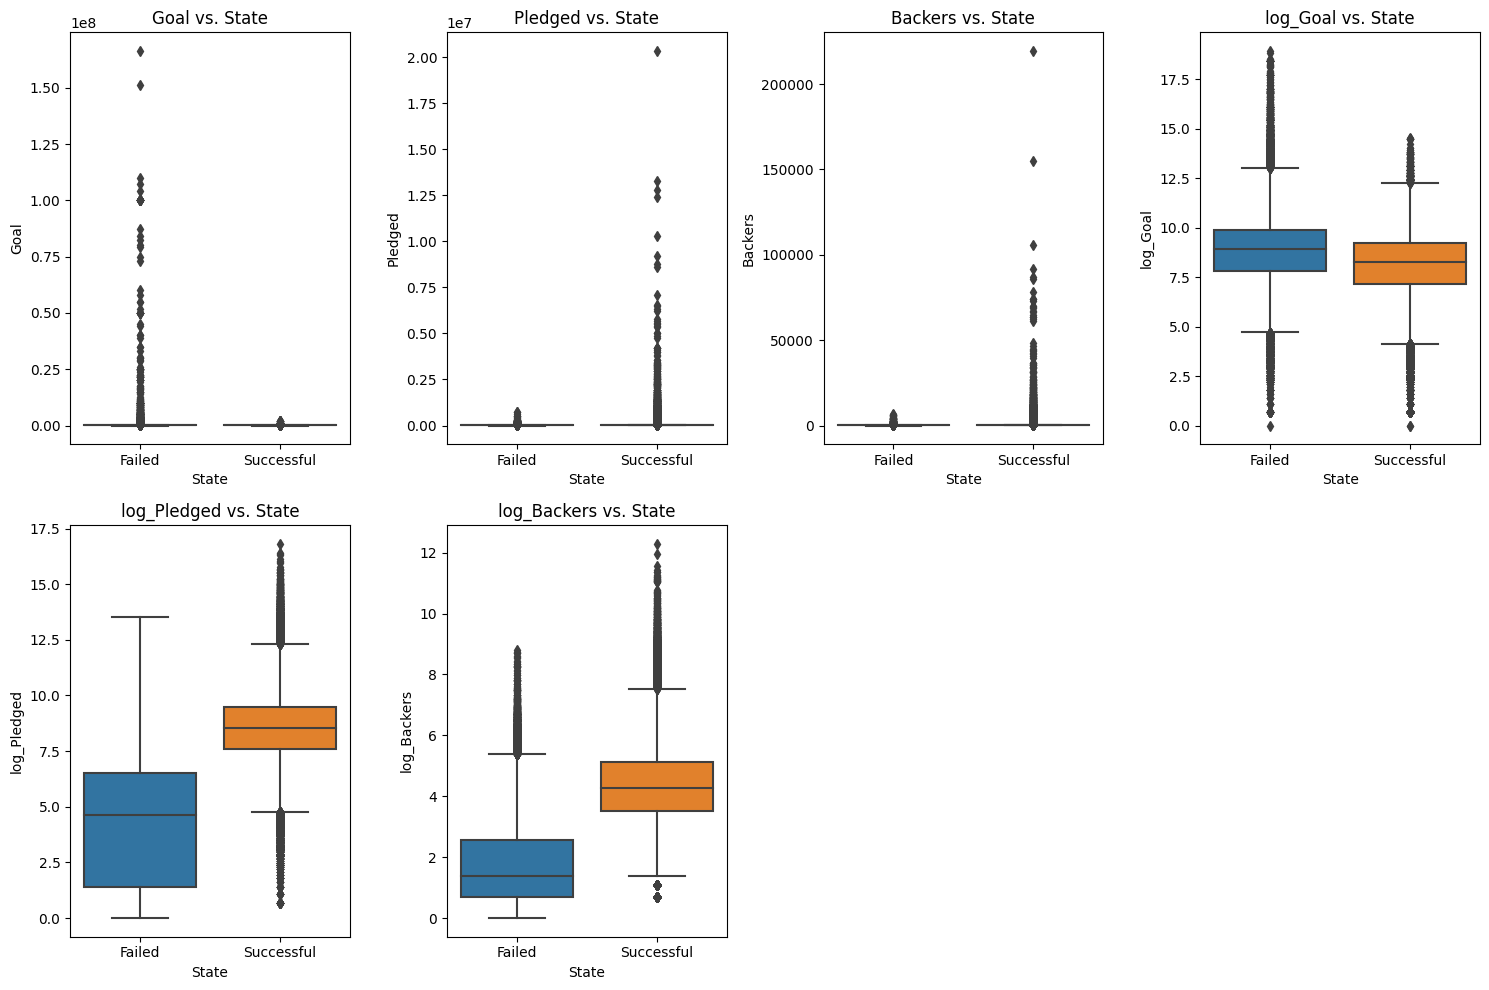

In [14]:
# Create box plots to compare distributions for successful vs. unsuccessful projects
plt.figure(figsize=(15, 10))

for i, col in enumerate(numerical_cols):
    plt.subplot(2, 4, i + 1)  # Adjust subplot layout if you have more features
    sns.boxplot(x='State', y=col, data=df_kickstarter_filtered)
    plt.title(f'{col} vs. State')

plt.tight_layout()
plt.show()


In [15]:
# Summary Statistics:
summary_stats = df_kickstarter_filtered.groupby('State')[numerical_cols].agg(['mean', 'median'])
print(summary_stats)

                    Goal               Pledged             Backers          
                    mean  median          mean  median        mean median   
State                                                                       
Failed      63189.223940  7500.0   1321.105434   100.0   16.431236    3.0  \
Successful   9535.703177  3840.0  22664.492249  5109.0  264.128397   71.0   

            log_Goal           log_Pledged           log_Backers            
                mean    median        mean    median        mean    median  
State                                                                       
Failed      8.891018  8.922792    4.219971  4.615121    1.682344  1.386294  
Successful  8.127745  8.253488    8.555972  8.538955    4.392724  4.276666  


#### Distribution of the Target Variable

In [16]:
# In absolute Numbers
state_counts = df_kickstarter_filtered['State'].value_counts()
print(state_counts)

State
Failed        197611
Successful    133851
Name: count, dtype: int64


In [17]:
# In Percentage
state_percentage = df_kickstarter_filtered['State'].value_counts(normalize=True) * 100
print(state_percentage)

State
Failed        59.617995
Successful    40.382005
Name: proportion, dtype: float64


**Slight Class Imbalance**
- while 40:60 isn't severely imbalanced, it can still bias some ML models and lead to suboptimal performance for the minority class
- metrics: accuracy might appear high simply because the model predicts the majority class most of the time

# Feature engineering

In [18]:
# Temporal patterns
df_kickstarter_filtered['ProjectDuration'] = (df_kickstarter_filtered['Deadline'] - df_kickstarter['Launched']).dt.days
df_kickstarter_filtered['LaunchYear'] = df_kickstarter_filtered['Launched'].dt.year
df_kickstarter_filtered['LaunchMonth'] = df_kickstarter_filtered['Launched'].dt.month
df_kickstarter_filtered['LaunchDay'] = df_kickstarter_filtered['Launched'].dt.day
df_kickstarter_filtered['DayOfWeek'] = df_kickstarter_filtered['Launched'].dt.dayofweek #0=Monday, 6=Sunday

In [19]:
# Percentage funded, handle 0 cases
def calculate_percentage_funded(row):
    if row['Goal'] == 0:
        if row['Pledged'] > 0:
            return 100  # 100% if Goal is 0 and Pledged > 0
        else:
            return 0    # 0% if Goal and Pledged are 0
    else:
        return (row['Pledged'] / row['Goal']) * 100

In [20]:
# Apply function
df_kickstarter_filtered['PercentageFunded'] = df_kickstarter_filtered.apply(calculate_percentage_funded, axis=1)

In [21]:
# Backers per Dollar pledged, handle 0 cases
def calculate_backers_per_dollar(row):
    if row['Pledged'] == 0:
        return 0 #Handle division by zero
    else:
        return row['Backers'] / row['Pledged']

In [22]:
# Apply function
df_kickstarter_filtered['BackersPerDollar'] = df_kickstarter_filtered.apply(calculate_backers_per_dollar, axis=1)

In [23]:
# Check new features
print(df_kickstarter_filtered[['Goal', 'Pledged', 'Backers', 'PercentageFunded', 'BackersPerDollar']].head())

    Goal  Pledged  Backers  PercentageFunded  BackersPerDollar
0   1000      625       30         62.500000          0.048000
1  80000       22        3          0.027500          0.136364
2     20       35        3        175.000000          0.085714
3     99      145       25        146.464646          0.172414
4   1900      387       10         20.368421          0.025840


In [24]:
df_kickstarter_filtered.columns

Index(['ID', 'Name', 'Category', 'Subcategory', 'Country', 'Launched',
       'Deadline', 'Goal', 'Pledged', 'Backers', 'State', 'log_Goal',
       'log_Pledged', 'log_Backers', 'State_num', 'ProjectDuration',
       'LaunchYear', 'LaunchMonth', 'LaunchDay', 'DayOfWeek',
       'PercentageFunded', 'BackersPerDollar'],
      dtype='object')

# Combining and Dropping Columns

In [25]:
# Make a copy of our df to be on the safe side
df_kickstarter_dropped = df_kickstarter_filtered.copy()

#### Drop Subcategory Columns

In [26]:
# Remove Subcategory Columns
df_kickstarter_dropped = df_kickstarter_dropped.drop(columns=['ID', 'Subcategory', 'State'])
print(f"Shape of DataFrame after removing subcategory columns: {df_kickstarter_dropped.shape}")

Shape of DataFrame after removing subcategory columns: (331462, 19)


## Splitting data for testing 

In [27]:
# Defining the target variable
y = df_kickstarter_dropped['State_num']

# Defining the input features
X = df_kickstarter_dropped.drop('State_num', axis=1)

In [28]:
# Split data into train and test sets (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=10)

# Text-Based Analysis

In [29]:
X_train['Name'].value_counts()

Name
New EP/Music Development                  11
New EP / Music Development                10
Pizza                                      7
Debut Album                                7
Choices                                    6
                                          ..
CHEMICAL CUT                               1
Bully: Simulated Abuse                     1
Conundrum.  Unordinary Granola.            1
Mission L.A.                               1
Chicago South Asian Film Festival 2017     1
Name: count, Length: 263802, dtype: int64

In [30]:
X_test['Name'].value_counts()

Name
Music Video                                            5
Reflections                                            5
Nocturne                                               4
Redemption                                             3
Nostalgia                                              3
                                                      ..
AquaJar: A love story between fish and plant           1
Bring Greenwald to Sweden                              1
Key West Contemporary Dance Company presents '1969'    1
Bricks and Mortar                                      1
JUMP! Family Entertainment                             1
Name: count, Length: 66161, dtype: int64

In [31]:
# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/vanessaroth/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/vanessaroth/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [34]:
# Preprocess text: remove punctuation, convert to lowercase, remove stopwords
def preprocess_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # remove punctuation
    text = text.lower()
    text = nltk.word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    text = [word for word in text if word not in stop_words]
    stemmer = PorterStemmer()
    text = [stemmer.stem(word) for word in text]
    return " ".join(text)

In [35]:
# Apply preprocessing to 'Name' column
X_train['cleaned_name'] = X_train['Name'].apply(preprocess_text)

In [36]:
X_test['cleaned_name'] = X_test['Name'].apply(preprocess_text)

In [37]:
# Load GloVe embeddings in batches
glove_file = 'data/glove.6B.50d.txt'
glove_model = {}

with open(glove_file, 'r', encoding='utf-8') as f: #Open the file
    for line in f:
        parts = line.strip().split()
        word = parts[0]
        vector = np.array(parts[1:], dtype=float) #Convert vector string parts to floats
        glove_model[word] = vector #Store the word and vector in the dictionary

print(f"GloVe model '{glove_file}' loaded successfully (in batches).")

GloVe model 'data/glove.6B.50d.txt' loaded successfully (in batches).


In [38]:
# Use glove_model dictionary to create document vectors
def create_document_vector(title, glove_model):
    words = title.split()
    vectors = []
    for word in words:
        if word in glove_model: #Check if the word is actually in the dict
            vectors.append(glove_model[word])
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(50) #50 because we use the 50-dimensional GloVe embeddings

In [39]:
# Apply function
X_train['glove_vector'] = X_train['cleaned_name'].apply(lambda x: create_document_vector(x, glove_model))

In [40]:
X_test['glove_vector'] = X_test['cleaned_name'].apply(lambda x: create_document_vector(x, glove_model))

In [41]:
# Check and verify embedding
print(X_train[['cleaned_name', 'glove_vector']].head())

                           cleaned_name   
162996                         basement  \
292914     leather bag handmad fairtrad   
125905     100 coolest wood creat figur   
58259   mcclanamania ed mcclanahan read   
28646           long green line webseri   

                                             glove_vector  
162996  [0.61918, 0.63082, 0.60009, -0.5461, 0.54093, ...  
292914  [-0.6541295, -0.223695, -0.29667499999999997, ...  
125905  [-0.26749999999999996, 0.054332500000000006, 0...  
58259   [-0.10530666666666666, 0.23354666666666665, 0....  
28646   [-0.10991, 0.5963083333333333, -0.056930000000...  


In [42]:
print(X_test[['cleaned_name', 'glove_vector']].head())

                                             cleaned_name   
101848                 eterium space combat sim window pc  \
88177                                      carri cah movi   
102893                                          buy coffe   
5204    passchendael stori war art new york intern fri...   
75268                           typefac presid unit state   

                                             glove_vector  
101848  [0.5778159999999999, -0.011517999999999983, 0....  
88177   [-0.117482, -0.09532999999999997, -0.177244999...  
102893  [0.76552, -0.12379, 1.144, 0.071116, 0.69537, ...  
5204    [0.05469616666666668, 0.34339499999999995, -0....  
75268   [-0.06752999999999998, -0.396077, 0.2767345, 0...  


In [43]:
# Zero vector analysis 
def is_zero_vector(vector):
    return all(v == 0 for v in vector)

zero_vector_count = X_train['glove_vector'].apply(is_zero_vector).sum()
total_vectors = len(X_train)
zero_vector_percentage = (zero_vector_count / total_vectors) * 100

print(f"Number of zero vectors: {zero_vector_count}/{total_vectors}")
print(f"Percentage of zero vectors: {zero_vector_percentage:.2f}%")

Number of zero vectors: 12703/265169
Percentage of zero vectors: 4.79%


In [44]:
# Quality Control: Cosine Similarity Analysis
def calculate_cosine_similarity(title1, title2, glove_model):
    vec1 = create_document_vector(title1, glove_model)
    vec2 = create_document_vector(title2, glove_model)
    similarity = cosine_similarity([vec1], [vec2])[0][0]  #Get the single similarity score
    return similarity

In [45]:
# Cluster to find similar project names
glove_matrix = np.array(X_train['glove_vector'].tolist())

# Scale the data (important for KMeans)
scaler = StandardScaler()
glove_matrix_scaled = scaler.fit_transform(glove_matrix)

# Choose the number of clusters (k) – experiment to find a good value
k = 10  #Start with a small number and experiment. You can use the elbow method to determine k.
kmeans = KMeans(n_clusters=k, random_state=42) #setting random state for reproducibility.
kmeans.fit(glove_matrix_scaled)

X_train['cluster'] = kmeans.labels_

# Find similar titles within the same cluster.
for i in range(k):
    cluster_df = X_train[X_train['cluster'] == i]
    print(f"Cluster {i}:")
    print(cluster_df[['cleaned_name']].head()) #Show top few titles in each cluster

Cluster 0:
                                  cleaned_name
260974         cadav card game aspir necromanc
352805  mysterion allinon oracl card play game
25666                     tour time emili davi
136447            ritual bicycl play card deck
329440                           sin play card
Cluster 1:
                                    cleaned_name
10738                              preserv album
41080              bosen sued cyt tour ep releas
338722  brigid bird margaret mclarti debut album
335524                               barrel band
127010              unsung musician motown empir
Cluster 2:
                                     cleaned_name
58259             mcclanamania ed mcclanahan read
201242                           time thief novel
197930                              afriq fashion
135658  rumspringa travel artist resid photo book
210343                8bit gospel john comic book
Cluster 3:
                                   cleaned_name
104021                    inyofa

In [46]:
# Pick example pairs for cosine similarity analysis. 
# Strategy: similar pairs (within-cluster), dissimilar pairs (between-clusters), and edge cases (diverse titles)
example_pairs = [
    # similar pairs within clusters
    ("cadav card game aspir necromanc", "ritual bicycl play card deck"), #Cluster 1
    ("nonplay card art inspir gener tool", "sin play card"), #Cluster 1 and 9 - interesting
    ("bad aunti kitchen smart", "black bean cafe"), #Cluster 8 and 5 
    
    # dissimilar pairs between clusters
    ("axx gener dublin", "sustain ship finit element analysi"),
    ("afriq fashion", "brigid bird margaret mclarti debut album"),
    ("arduino high power hbridg motor shield ", "coadabear sweet")
]

In [47]:
for example_pair in example_pairs:
    similarity = calculate_cosine_similarity(example_pair[0], example_pair[1], glove_model)
    print(f"Cosine similarity between '{example_pair[0]}' and '{example_pair[1]}': {similarity:.3f}")

Cosine similarity between 'cadav card game aspir necromanc' and 'ritual bicycl play card deck': 0.842
Cosine similarity between 'nonplay card art inspir gener tool' and 'sin play card': 0.620
Cosine similarity between 'bad aunti kitchen smart' and 'black bean cafe': 0.625
Cosine similarity between 'axx gener dublin' and 'sustain ship finit element analysi': -0.117
Cosine similarity between 'afriq fashion' and 'brigid bird margaret mclarti debut album': 0.413
Cosine similarity between 'arduino high power hbridg motor shield ' and 'coadabear sweet': 0.180


#### Summary Interpretation:
- GloVe embedding seems reasonably effective in capturing semantic relationships, particularly for closely related titles
- however: 'hand made guitar pick' and 'new kitchen tool' share high similarity as well - maybe due to limitations of the GloVe model (trained on general corpus of words, not specifically project titles)

#### Flatten GloVe vector for downstream analysis

In [48]:
# Flatten GloVe vectors into separate columns
glove_vectors = np.vstack(X_train['glove_vector'].values)

In [49]:
glove_vectors2 = np.vstack(X_test['glove_vector'].values)

In [50]:
# Convert 2D array into a DF with appropriate column names
glove_df = pd.DataFrame(glove_vectors, columns=[f'glove_dim_{i+1}' for i in range(glove_vectors.shape[1])])

In [51]:
glove_df2 = pd.DataFrame(glove_vectors2, columns=[f'glove_dim_{i+1}' for i in range(glove_vectors2.shape[1])])

In [52]:
# Handle NaNs: fill with 0
glove_df = glove_df.fillna(0)

In [53]:
glove_df2 = glove_df2.fillna(0)

In [54]:
# Drop original glove_vector column and concatenate the new GloVe columns
X_train = X_train.drop(columns=['glove_vector']).reset_index(drop=True)
X_train = pd.concat([X_train, glove_df], axis=1)

In [55]:
X_test = X_test.drop(columns=['glove_vector']).reset_index(drop=True)
X_test = pd.concat([X_test, glove_df2], axis=1)

In [56]:
X_train.columns

Index(['Name', 'Category', 'Country', 'Launched', 'Deadline', 'Goal',
       'Pledged', 'Backers', 'log_Goal', 'log_Pledged', 'log_Backers',
       'ProjectDuration', 'LaunchYear', 'LaunchMonth', 'LaunchDay',
       'DayOfWeek', 'PercentageFunded', 'BackersPerDollar', 'cleaned_name',
       'cluster', 'glove_dim_1', 'glove_dim_2', 'glove_dim_3', 'glove_dim_4',
       'glove_dim_5', 'glove_dim_6', 'glove_dim_7', 'glove_dim_8',
       'glove_dim_9', 'glove_dim_10', 'glove_dim_11', 'glove_dim_12',
       'glove_dim_13', 'glove_dim_14', 'glove_dim_15', 'glove_dim_16',
       'glove_dim_17', 'glove_dim_18', 'glove_dim_19', 'glove_dim_20',
       'glove_dim_21', 'glove_dim_22', 'glove_dim_23', 'glove_dim_24',
       'glove_dim_25', 'glove_dim_26', 'glove_dim_27', 'glove_dim_28',
       'glove_dim_29', 'glove_dim_30', 'glove_dim_31', 'glove_dim_32',
       'glove_dim_33', 'glove_dim_34', 'glove_dim_35', 'glove_dim_36',
       'glove_dim_37', 'glove_dim_38', 'glove_dim_39', 'glove_dim_40',
   

In [57]:
X_test.columns

Index(['Name', 'Category', 'Country', 'Launched', 'Deadline', 'Goal',
       'Pledged', 'Backers', 'log_Goal', 'log_Pledged', 'log_Backers',
       'ProjectDuration', 'LaunchYear', 'LaunchMonth', 'LaunchDay',
       'DayOfWeek', 'PercentageFunded', 'BackersPerDollar', 'cleaned_name',
       'glove_dim_1', 'glove_dim_2', 'glove_dim_3', 'glove_dim_4',
       'glove_dim_5', 'glove_dim_6', 'glove_dim_7', 'glove_dim_8',
       'glove_dim_9', 'glove_dim_10', 'glove_dim_11', 'glove_dim_12',
       'glove_dim_13', 'glove_dim_14', 'glove_dim_15', 'glove_dim_16',
       'glove_dim_17', 'glove_dim_18', 'glove_dim_19', 'glove_dim_20',
       'glove_dim_21', 'glove_dim_22', 'glove_dim_23', 'glove_dim_24',
       'glove_dim_25', 'glove_dim_26', 'glove_dim_27', 'glove_dim_28',
       'glove_dim_29', 'glove_dim_30', 'glove_dim_31', 'glove_dim_32',
       'glove_dim_33', 'glove_dim_34', 'glove_dim_35', 'glove_dim_36',
       'glove_dim_37', 'glove_dim_38', 'glove_dim_39', 'glove_dim_40',
       'glove_

In [ ]:
# Drop unnecessary Name column + Datetime columns + non-log columns
X_train = X_train.drop(columns=['Name', 'cleaned_name', 'Launched', 'Deadline', 'Goal', 'Backers', 'Pledged', 'cluster'])

In [59]:
X_test = X_test.drop(columns=['Name', 'cleaned_name', 'Launched', 'Deadline', 'Goal', 'Backers', 'Pledged'])

# One-hot Encoding categorical features

In [64]:
# Categorical columns
categorical_cols = ['Category', 'Country', 'DayOfWeek', 'LaunchMonth', 'LaunchYear']

In [65]:
# Create column transformer
ct = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols)
    ],
    remainder='passthrough' #keep other columns as they are
)

In [66]:
# Apply one-hot encoding
encoded_data = ct.fit_transform(X_train)

In [67]:
encoded_data2 = ct.fit_transform(X_test)

In [68]:
# Ensure proper DF Conversion
X_train_encoded_df = pd.DataFrame(encoded_data, columns=ct.get_feature_names_out())

# Infer numeric types
X_train_encoded_df = X_train_encoded_df.apply(pd.to_numeric, errors='ignore')

# Check
X_train_encoded_df.dtypes

encoder__Category_Art       float64
encoder__Category_Comics    float64
encoder__Category_Crafts    float64
encoder__Category_Dance     float64
encoder__Category_Design    float64
                             ...   
remainder__glove_dim_46     float64
remainder__glove_dim_47     float64
remainder__glove_dim_48     float64
remainder__glove_dim_49     float64
remainder__glove_dim_50     float64
Length: 122, dtype: object

In [69]:
# Ensure proper DF Conversion
X_test_encoded_df = pd.DataFrame(encoded_data2, columns=ct.get_feature_names_out())

# Infer numeric types
X_test_encoded_df = X_test_encoded_df.apply(pd.to_numeric, errors='ignore')

# Check
X_test_encoded_df.dtypes

encoder__Category_Art       float64
encoder__Category_Comics    float64
encoder__Category_Crafts    float64
encoder__Category_Dance     float64
encoder__Category_Design    float64
                             ...   
remainder__glove_dim_46     float64
remainder__glove_dim_47     float64
remainder__glove_dim_48     float64
remainder__glove_dim_49     float64
remainder__glove_dim_50     float64
Length: 122, dtype: object

In [70]:
#Verification: Check the shape of the DataFrame
print("Original X train DataFrame shape:", X_train.shape)
print("Encoded X train DataFrame shape:", X_train_encoded_df.shape)

Original X train DataFrame shape: (265169, 62)
Encoded X train DataFrame shape: (265169, 122)


In [71]:
print("Original X train DataFrame shape:", X_test.shape)
print("Encoded X train DataFrame shape:", X_test_encoded_df.shape)

Original X train DataFrame shape: (66293, 62)
Encoded X train DataFrame shape: (66293, 122)


#### Combine countries to continents

In [72]:
# Dictionary for mapping
country_to_continent = {
    'United States': 'North America',
    'Canada': 'North America',
    'Mexico': 'North America',
    'United Kingdom': 'Europe',
    'Germany': 'Europe',
    'France': 'Europe',
    'Italy': 'Europe',
    'Spain': 'Europe',
    'Netherlands': 'Europe',
    'Belgium': 'Europe',
    'Switzerland': 'Europe',
    'Sweden': 'Europe',
    'Denmark': 'Europe',
    'Norway': 'Europe',
    'Austria': 'Europe',
    'Ireland': 'Europe',
    'Luxembourg': 'Europe',
    'Australia': 'Oceania',
    'New Zealand': 'Oceania',
    'Hong Kong': 'Asia',
    'Singapore': 'Asia',
    'Japan': 'Asia',
}

In [73]:
# Create Country Column and map them to continents
country_cols = X_train_encoded_df.filter(regex='^encoder__Country_').columns

continent_features = {}
for country_col in country_cols:
    country = country_col.replace('encoder__Country_', '')
    if country in country_to_continent:
        continent = country_to_continent[country]
        if continent not in continent_features:
            continent_features[continent] = 0
        continent_features[continent] += X_train_encoded_df[country_col]

In [74]:
country_cols = X_test_encoded_df.filter(regex='^encoder__Country_').columns

continent_features = {}
for country_col in country_cols:
    country = country_col.replace('encoder__Country_', '')
    if country in country_to_continent:
        continent = country_to_continent[country]
        if continent not in continent_features:
            continent_features[continent] = 0
        continent_features[continent] += X_test_encoded_df[country_col]

In [75]:
# Create new continent columns 
for continent, values in continent_features.items():
    X_train_encoded_df[f'continent_{continent}'] = values

In [76]:
for continent, values in continent_features.items():
    X_test_encoded_df[f'continent_{continent}'] = values

In [77]:
# Remove the original country columns
X_train_encoded_df = X_train_encoded_df.drop(columns=country_cols)

In [78]:
X_test_encoded_df = X_test_encoded_df.drop(columns=country_cols)

In [79]:
# Verify
print(X_train_encoded_df.shape)

(265169, 104)


In [80]:
print(X_test_encoded_df.shape)

(66293, 104)


#### Clean up column names

In [81]:
# Function to clean column names
def clean_column_names(col_name):
    # Remove known prefixes
    col_name = col_name.replace('encoder__', '').replace('remainder__', '')
    # Optionally, replace underscores with spaces or hyphens for better readability
    col_name = col_name.replace('_', ' ')
    return col_name

# Apply the function to rename columns
X_train_encoded_df.columns = [clean_column_names(col) for col in X_train_encoded_df.columns]

In [82]:
X_test_encoded_df.columns = [clean_column_names(col) for col in X_test_encoded_df.columns]

In [83]:
# Print all column names as a list
X_train_encoded_df.dtypes


Category Art               float64
Category Comics            float64
Category Crafts            float64
Category Dance             float64
Category Design            float64
                            ...   
glove dim 50               float64
continent Oceania          float64
continent Europe           float64
continent North America    float64
continent Asia             float64
Length: 104, dtype: object

In [132]:
# Access the 48th, 44th, 45th, 43rd, and 49th columns
columns_of_interest = X_test_encoded_df.iloc[:, [47, 43, 44, 42, 48]]

# Display the selected columns
print(columns_of_interest)

       LaunchDay   log Goal  log Pledged  LaunchYear 2017  PercentageFunded
0            1.0  10.126671    10.158556              0.0        103.240000
1           19.0  10.968216     5.849325              0.0          0.596552
2           10.0   7.444833     5.209486              0.0         10.643275
3            6.0   7.824446     7.875119              0.0        105.200000
4           14.0   4.615121     0.000000              0.0          0.000000
...          ...        ...          ...              ...               ...
66288        8.0   6.552508     0.000000              0.0          0.000000
66289       15.0   8.517393     7.064759              0.0         23.380000
66290        8.0  10.819798     3.931826              0.0          0.100000
66291       12.0   7.090910     7.175490              0.0        108.833333
66292       15.0  11.225257     3.258097              0.0          0.033333

[66293 rows x 5 columns]


In [84]:
X_test_encoded_df.dtypes

Category Art               float64
Category Comics            float64
Category Crafts            float64
Category Dance             float64
Category Design            float64
                            ...   
glove dim 50               float64
continent Oceania          float64
continent Europe           float64
continent North America    float64
continent Asia             float64
Length: 104, dtype: object

# Scaling

In [85]:
# Feature Scaling: Train Scaler on X_train
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded_df)

In [86]:
X_test_scaled = scaler.transform(X_test_encoded_df)

## Baseline model

In [87]:
# Set up baseline model
baseline_model = LogisticRegression(random_state=SEED, max_iter=1000)

In [ ]:
X_train_scaled_df = pd.DataFrame(X_train_scaled)

missing_data = X_train_scaled_df.isnull().sum()
missing_data = missing_data[missing_data > 0]  # Filter out columns with no missing values
print(missing_data.sort_values(ascending=False))  # Sort by missing value count


100    198876
101    198876
102    198876
103    198876
dtype: int64


In [98]:
# Identify columns with missing values
columns_with_nan = X_train_scaled_df.columns[X_train_scaled_df.isnull().any()]

# Drop these columns
X_train_scaled_df = X_train_scaled_df.drop(columns=columns_with_nan)

# Confirm the result: Check again for remaining missing values
print(f"Columns dropped: {columns_with_nan.tolist()}")
print(f"Remaining missing values:\n{X_train_scaled_df.isnull().sum().sum()}")


Columns dropped: [100, 101, 102, 103]
Remaining missing values:
0


In [105]:
# Fit the model
baseline_model.fit(X_train_scaled_df, y_train)

LogisticRegression(max_iter=1000, random_state=50)

In [111]:
X_test_scaled_df = pd.DataFrame(X_test_scaled)

# Drop the same columns as in X_train_scaled_df
X_test_scaled_df = X_test_scaled_df.drop(columns=columns_with_nan)

In [113]:
# Make predictions
y_pred = baseline_model.predict(X_test_scaled_df)

#### Evaluate the baseline model

In [114]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")

Accuracy: 0.9979635858989637
Confusion Matrix:
[[39388   135]
 [    0 26770]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     39523
           1       0.99      1.00      1.00     26770

    accuracy                           1.00     66293
   macro avg       1.00      1.00      1.00     66293
weighted avg       1.00      1.00      1.00     66293



In [ ]:
# Compute the correlation matrix
correlation_matrix = X_train_scaled_df.corr()

# Display the matrix
print(correlation_matrix)


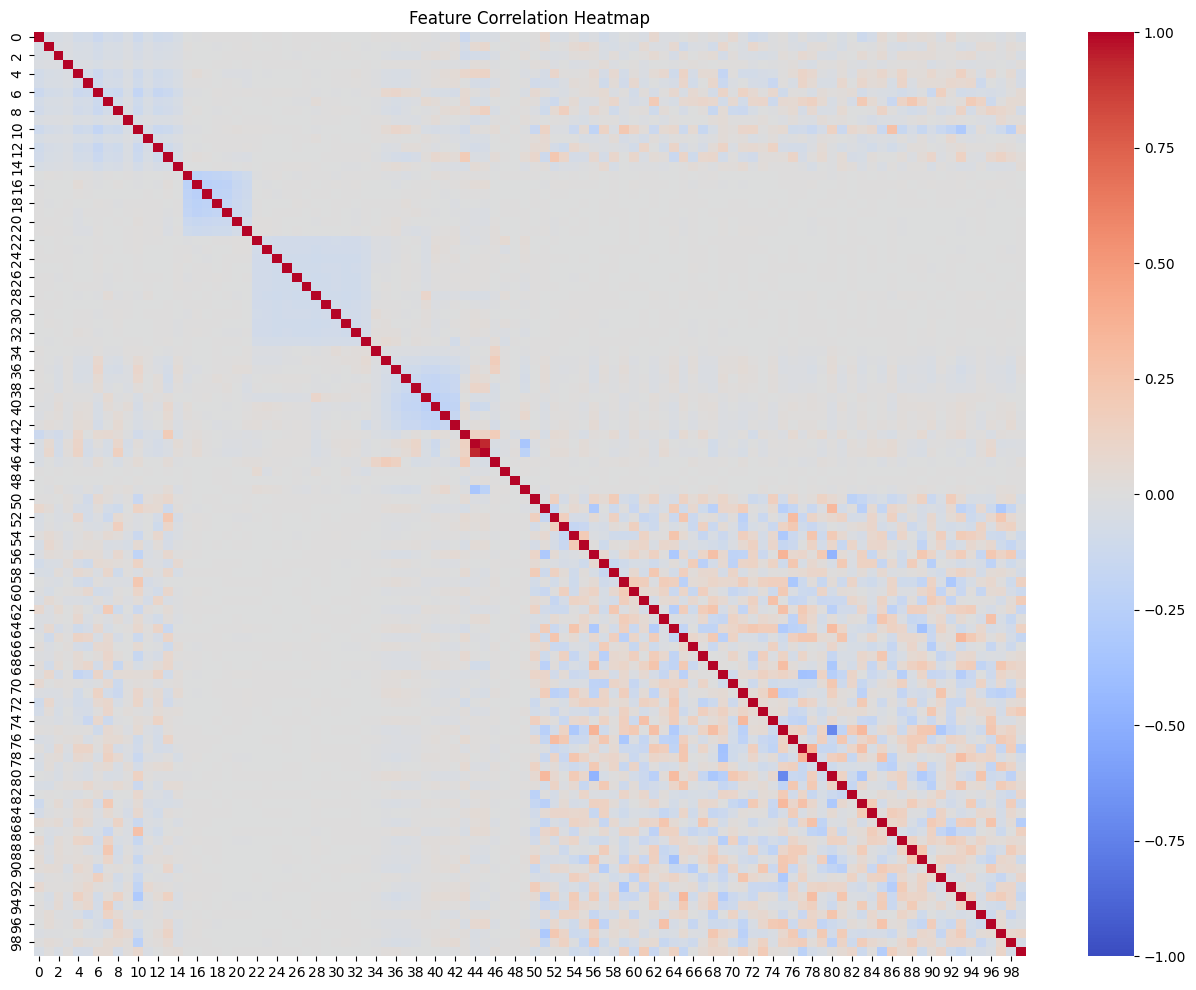

In [116]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, fmt=".2f", vmin=-1, vmax=1)
plt.title("Feature Correlation Heatmap")
plt.show()


## Baseline Model without GloVe Embedding

In [117]:
# Set up baseline model
baseline_model = LogisticRegression(random_state=SEED, max_iter=1000)

In [ ]:
X_train_scaled_df = pd.DataFrame(X_train_scaled)

In [120]:
X_train_reduced = X_train_scaled_df.iloc[:, :50]

In [121]:
# Fit the model
baseline_model.fit(X_train_reduced, y_train)

LogisticRegression(max_iter=1000, random_state=50)

In [122]:
X_test_scaled_df = pd.DataFrame(X_test_scaled)

X_test_reduced = X_test_scaled_df.iloc[:, :50]

In [123]:
# Make predictions
y_pred = baseline_model.predict(X_test_reduced)

In [124]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")

Accuracy: 0.99802392409455
Confusion Matrix:
[[39392   131]
 [    0 26770]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     39523
           1       1.00      1.00      1.00     26770

    accuracy                           1.00     66293
   macro avg       1.00      1.00      1.00     66293
weighted avg       1.00      1.00      1.00     66293



In [ ]:
X_train_reduced.dtypes

## Baseline with Random Forest

In [130]:
from sklearn.ensemble import RandomForestClassifier

# Fit a RandomForest to get feature importances
rf_model = RandomForestClassifier()
rf_model.fit(X_train_reduced, y_train)

# Get feature importances
importances = rf_model.feature_importances_
print(importances)


[2.40284671e-04 3.01872443e-04 1.11284070e-04 3.32841573e-04
 4.36488286e-04 4.05721142e-04 1.28043225e-04 5.21176247e-04
 3.69212296e-04 1.44508479e-05 1.92353065e-03 2.92833038e-05
 1.91168177e-04 1.87020596e-03 8.63178487e-04 9.46157995e-05
 1.16151010e-04 1.04523152e-04 9.32022030e-05 1.12605070e-04
 9.69930542e-05 6.38018504e-05 7.47386286e-05 7.59690294e-05
 8.08809712e-05 7.66109679e-05 7.61976115e-05 7.14642532e-05
 9.97881926e-05 7.43882408e-05 7.25557972e-05 7.91556240e-05
 8.47135224e-05 5.51887329e-05 1.34371324e-05 8.02629930e-05
 1.96600395e-04 1.53110962e-04 2.94390030e-04 2.09686426e-04
 4.54091538e-04 9.62083553e-05 1.14510387e-04 4.69280769e-02
 1.64015321e-01 1.47907054e-01 5.07105724e-03 6.92149023e-04
 5.97097467e-01 2.73342907e-02]


In [131]:
feature_names = X_train_reduced.columns  # Assuming you have column names in X_train_scaled
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)


    Feature  Importance
48       48    0.597097
44       44    0.164015
45       45    0.147907
43       43    0.046928
49       49    0.027334
46       46    0.005071
10       10    0.001924
13       13    0.001870
14       14    0.000863
47       47    0.000692
7         7    0.000521
40       40    0.000454
4         4    0.000436
5         5    0.000406
8         8    0.000369
3         3    0.000333
1         1    0.000302
38       38    0.000294
0         0    0.000240
39       39    0.000210
36       36    0.000197
12       12    0.000191
37       37    0.000153
6         6    0.000128
16       16    0.000116
42       42    0.000115
19       19    0.000113
2         2    0.000111
17       17    0.000105
28       28    0.000100
20       20    0.000097
41       41    0.000096
15       15    0.000095
18       18    0.000093
32       32    0.000085
24       24    0.000081
35       35    0.000080
31       31    0.000079
25       25    0.000077
26       26    0.000076
23       23    0

## Trainining the model